# Time Series - Data For Regression

- Read Time series Data
- Convert the data into *`Features`* and *`Target`*
- Save in a csv file for use in modules like TPOT

Importing required libraries. 


In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more beautiful plots
%matplotlib inline

In [2]:
# Set sns to show some standard charectaristics throughout the notebook

sns.set(context='talk', style='darkgrid', palette='deep', 
        font='sans-serif', font_scale=1.2, color_codes=False,
        rc={"lines.linewidth": 2})

#sns.set_context("paper")
#sns.set_context("talk")
#sns.set_context("poster")
#sns.set_context("notebook")

#### Familiarising with the data

In [3]:
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


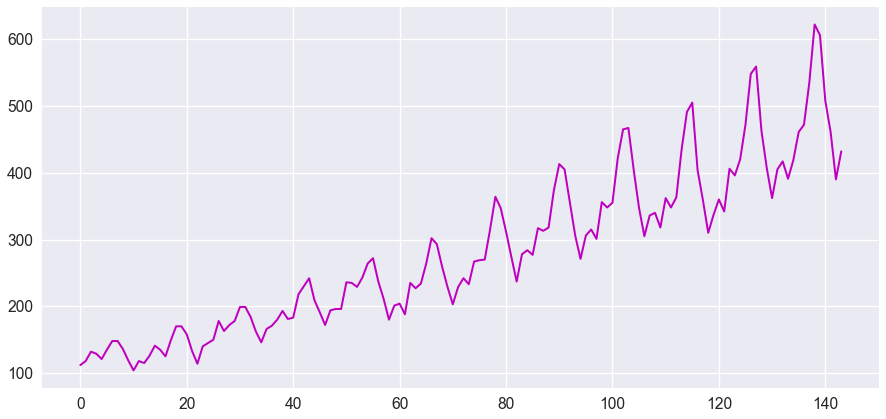

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(df.Passengers, 'm')
plt.show()

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]             #, 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back])     #, 0])
	return np.array(dataX), np.array(dataY)
#	return dataX, dataY

If you compare these first 5 rows to the original dataset sample listed in the previous section, you can see the X=t-2, t-1, t and Y=t+1 pattern in the numbers.


If `Look back` value is large enough, then the prediction tends to become more accurate.
Usually a dataset which has monthly data points will require a look back value 12 or above. I usually give 18 to set the training process aware of not just the same month last year but few more past months from that.  

In [7]:
look_back = 18

dataset = df.Passengers.values      ##   convert the data-frame to its Numpy-array

dataset[:5]

array([112, 118, 132, 129, 121])

In [8]:
data, target = create_dataset(dataset, look_back)


In [9]:
np.array(data)[:6]

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149],
       [118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170],
       [132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141,
        135, 125, 149, 170, 170],
       [129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135,
        125, 149, 170, 170, 158],
       [121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125,
        149, 170, 170, 158, 133],
       [135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125, 149,
        170, 170, 158, 133, 114]])

In [10]:
np.array(target)[:6]

array([170, 170, 158, 133, 114, 140])

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit 

In [12]:
tscv = TimeSeriesSplit(n_splits=5)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    train_size=0.75, test_size=0.25)


In [14]:
from tpot import TPOTRegressor


In [15]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)

In [16]:
tpot.fit(X_train, y_train)

Optimization Progress:  33%|███▎      | 40/120 [00:11<00:24,  3.32pipeline/s]

Generation 1 - Current best internal CV score: -162.07821266877949


Optimization Progress:  50%|█████     | 60/120 [00:17<00:18,  3.23pipeline/s]

Generation 2 - Current best internal CV score: -162.07821266877943


Optimization Progress:  67%|██████▋   | 80/120 [00:23<00:09,  4.10pipeline/s]

Generation 3 - Current best internal CV score: -162.07821266877943


Optimization Progress:  83%|████████▎ | 100/120 [00:26<00:03,  6.52pipeline/s]

Generation 4 - Current best internal CV score: -159.78654223052376


Generation 5 - Current best internal CV score: -150.6547743574938

Best pipeline: RidgeCV(SelectPercentile(SelectPercentile(input_matrix, percentile=55), percentile=59))


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=5, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
       offspring_size=20, periodic_checkpoint_folder=None,
       population_size=20, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

In [17]:
print(tpot.score(np.array(X_test), np.array(y_test)))

-110.7469795497


In [18]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    #plt.plot(y_test.values, label="actual", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        # scale = 1.96
        scale = 2.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bound / lower bound", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

Optimization Progress:  33%|███▎      | 40/120 [00:07<00:31,  2.53pipeline/s]

Generation 1 - Current best internal CV score: -398.6019715162772


Optimization Progress:  50%|█████     | 60/120 [00:10<00:10,  5.74pipeline/s]

Generation 2 - Current best internal CV score: -398.6019715162772


Optimization Progress:  67%|██████▋   | 80/120 [00:13<00:04,  8.06pipeline/s]

Generation 3 - Current best internal CV score: -398.6019715162772


Optimization Progress:  83%|████████▎ | 100/120 [00:16<00:03,  5.21pipeline/s]

Generation 4 - Current best internal CV score: -398.6019715162772


Generation 5 - Current best internal CV score: -398.6019715162772

Best pipeline: ElasticNetCV(MinMaxScaler(input_matrix), l1_ratio=1.0, tol=0.0001)


Optimization Progress:  33%|███▎      | 40/120 [00:09<00:22,  3.51pipeline/s]

Generation 1 - Current best internal CV score: -424.3790586015722


Optimization Progress:  50%|█████     | 60/120 [00:14<00:11,  5.21pipeline/s]

Generation 2 - Current best internal CV score: -424.3790586015722


Optimization Progress:  67%|██████▋   | 80/120 [00:18<00:05,  6.69pipeline/s]

Generation 3 - Current best internal CV score: -262.87168371834025


Optimization Progress:  83%|████████▎ | 100/120 [00:23<00:04,  4.05pipeline/s]

Generation 4 - Current best internal CV score: -262.87168371834025


Generation 5 - Current best internal CV score: -262.87168371834025

Best pipeline: RidgeCV(SelectPercentile(input_matrix, percentile=31))


Optimization Progress:  33%|███▎      | 40/120 [00:06<00:11,  7.15pipeline/s]

Generation 1 - Current best internal CV score: -227.50280346202013


Optimization Progress:  50%|█████     | 60/120 [00:11<00:19,  3.13pipeline/s]

Generation 2 - Current best internal CV score: -227.50280346202013


Optimization Progress:  67%|██████▋   | 80/120 [00:15<00:08,  4.82pipeline/s]

Generation 3 - Current best internal CV score: -227.50280346202013


Optimization Progress:  83%|████████▎ | 100/120 [00:18<00:03,  5.21pipeline/s]

Generation 4 - Current best internal CV score: -226.39272996073882


Generation 5 - Current best internal CV score: -175.41788858302965

Best pipeline: LassoLarsCV(DecisionTreeRegressor(SelectPercentile(LinearSVR(input_matrix, C=0.0001, dual=True, epsilon=1.0, loss=epsilon_insensitive, tol=0.1), percentile=43), max_depth=1, min_samples_leaf=15, min_samples_split=9), normalize=False)


Optimization Progress:  33%|███▎      | 40/120 [00:09<00:21,  3.78pipeline/s]

Generation 1 - Current best internal CV score: -207.2832453913049


Optimization Progress:  50%|█████     | 60/120 [00:16<00:23,  2.51pipeline/s]

Generation 2 - Current best internal CV score: -207.2832453913049


Optimization Progress:  67%|██████▋   | 80/120 [00:24<00:08,  4.87pipeline/s]

Generation 3 - Current best internal CV score: -203.61950909936496


Optimization Progress:  83%|████████▎ | 100/120 [00:28<00:03,  5.25pipeline/s]

Generation 4 - Current best internal CV score: -196.30467700649515


Generation 5 - Current best internal CV score: -195.73632231673562

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.4, tol=0.001)


Optimization Progress:  33%|███▎      | 40/120 [00:10<00:30,  2.64pipeline/s]

Generation 1 - Current best internal CV score: -153.24684249425107


Optimization Progress:  50%|█████     | 60/120 [00:16<00:27,  2.15pipeline/s]

Generation 2 - Current best internal CV score: -153.24684249425107


Optimization Progress:  67%|██████▋   | 80/120 [00:20<00:08,  4.94pipeline/s]

Generation 3 - Current best internal CV score: -151.92534738559303


Optimization Progress:  83%|████████▎ | 100/120 [00:23<00:04,  4.34pipeline/s]

Generation 4 - Current best internal CV score: -151.92534738559303


Generation 5 - Current best internal CV score: -151.92534738559303

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.6000000000000001, tol=0.001)


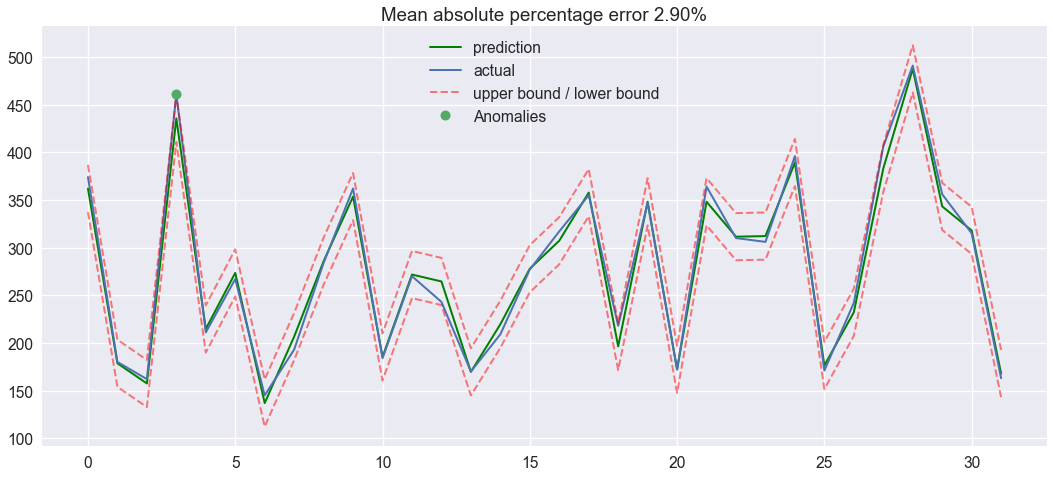

In [19]:
plotModelResults(tpot, np.array(X_train), np.array(X_test), plot_intervals=True, plot_anomalies=True)


#### Mean Absolute Percentage Error: 2.9 Look_back: 18
#### Mean Absolute Percentage Error: 8.0 Look_back: 6